# $CO_2$ Saturation Diagrams

*Alexander Osorio C., 2025*

## Setup

### Installing PYroMat

In [1]:
# !pip install pyromat

### Importing packages

In [2]:
import pyromat as pyro
import numpy   as np
import seaborn as sns
import pandas  as pd
import matplotlib.pyplot as plt

In [3]:
# Uses seaborn to update matplotlib's run commands (rc) parameters to improve aesthetics

sns.set_theme(context='notebook',
              style='darkgrid',
              palette='deep',
              font='sans-serif',
              font_scale=1.2,
              color_codes=True,
              rc=None)

### Using SI units in PYroMat

In [ ]:
pyro.config["unit_pressure"] = "kPa"
pyro.config["unit_energy"]   = "kJ"
pyro.config["unit_matter"]   = "kg"

## Retrieving data from multi-phase $CO_2$

In [5]:
CO2 = pyro.get('mp.CO2')

### Triple point properties of $CO_2$

In [6]:
Tt, Pt = CO2.triple()

print(f'Triple Point Temperature: {Tt:.2f} K')
print(f'   Triple Point Pressure: {Pt:.5f} kPa')

Triple Point Temperature: 216.59 K
   Triple Point Pressure: 517.95000 kPa


### Critical point properties of $CO_2$

In [7]:
Tc, Pc = CO2.critical()

print(f'Critical Point Temperature: {Tc:.2f} K')
print(f'   Critical Point Pressure: {Pc:.0f} kPa')

Critical Point Temperature: 304.13 K
   Critical Point Pressure: 7377 kPa


## Equilibrium states of the two-phase mixture

### Temperature interval of the saturation region

In [8]:
# Temperature vector spanning (Tt, Tc) with a 0.5 K step (avoid including the exact endpoints)
T = np.arange(Tt + 1e-3, Tc - 1e-3, 0.5) # K

print(f"T grid: {T[0]:.2f} K to {T[-1]:.2f} K; n = {T.size} points")

T grid: 216.59 K to 304.09 K; n = 176 points


### Saturation pressures

In [9]:
psat = CO2.ps(T=T) # kPa

### Saturated liquid and vapor specific volumes

In [10]:
vf, vg = CO2.vs(T) # m³/kg

### Saturated liquid and vapor specific entropies

In [11]:
sf, sg = CO2.ss(T) # kJ/kg·K

PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.


### Saturation properties

In [12]:
# Create a DataFrame for the saturation properties
sat_CO2 = pd.DataFrame({
    "Tsat (K)": T,
    "Psat (kPa)": psat,
    "v𝑓 (m³/kg)": vf,
    "v𝑔 (m³/kg)": vg,
    "s𝑓 (kJ/kg·K)": sf,
    "s𝑔 (kJ/kg·K)": sg,
})

# Peek
sat_CO2.head(11)

,Tsat (K),Psat (kPa),v𝑓 (m³/kg),v𝑔 (m³/kg),s𝑓 (kJ/kg·K),s𝑔 (kJ/kg·K)
0,216.593,517.984361,0.000849,0.072664,-2.217741,-0.599996
1,217.093,529.339375,0.000850,0.071176,-2.213268,-0.602904
2,217.593,540.881603,0.000851,0.069725,-2.208804,-0.605800
3,218.093,552.612992,0.000852,0.068310,-2.204347,-0.608682
4,218.593,564.535496,0.000854,0.066929,-2.199899,-0.611552
5,219.093,576.651075,0.000855,0.065583,-2.195459,-0.614410
6,219.593,588.961693,0.000856,0.064269,-2.191026,-0.617256
7,220.093,601.469320,0.000858,0.062987,-2.186601,-0.620090
8,220.593,614.175935,0.000859,0.061736,-2.182183,-0.622912
9,221.093,627.083518,0.000860,0.060515,-2.177774,-0.625722


## *P - T* diagram

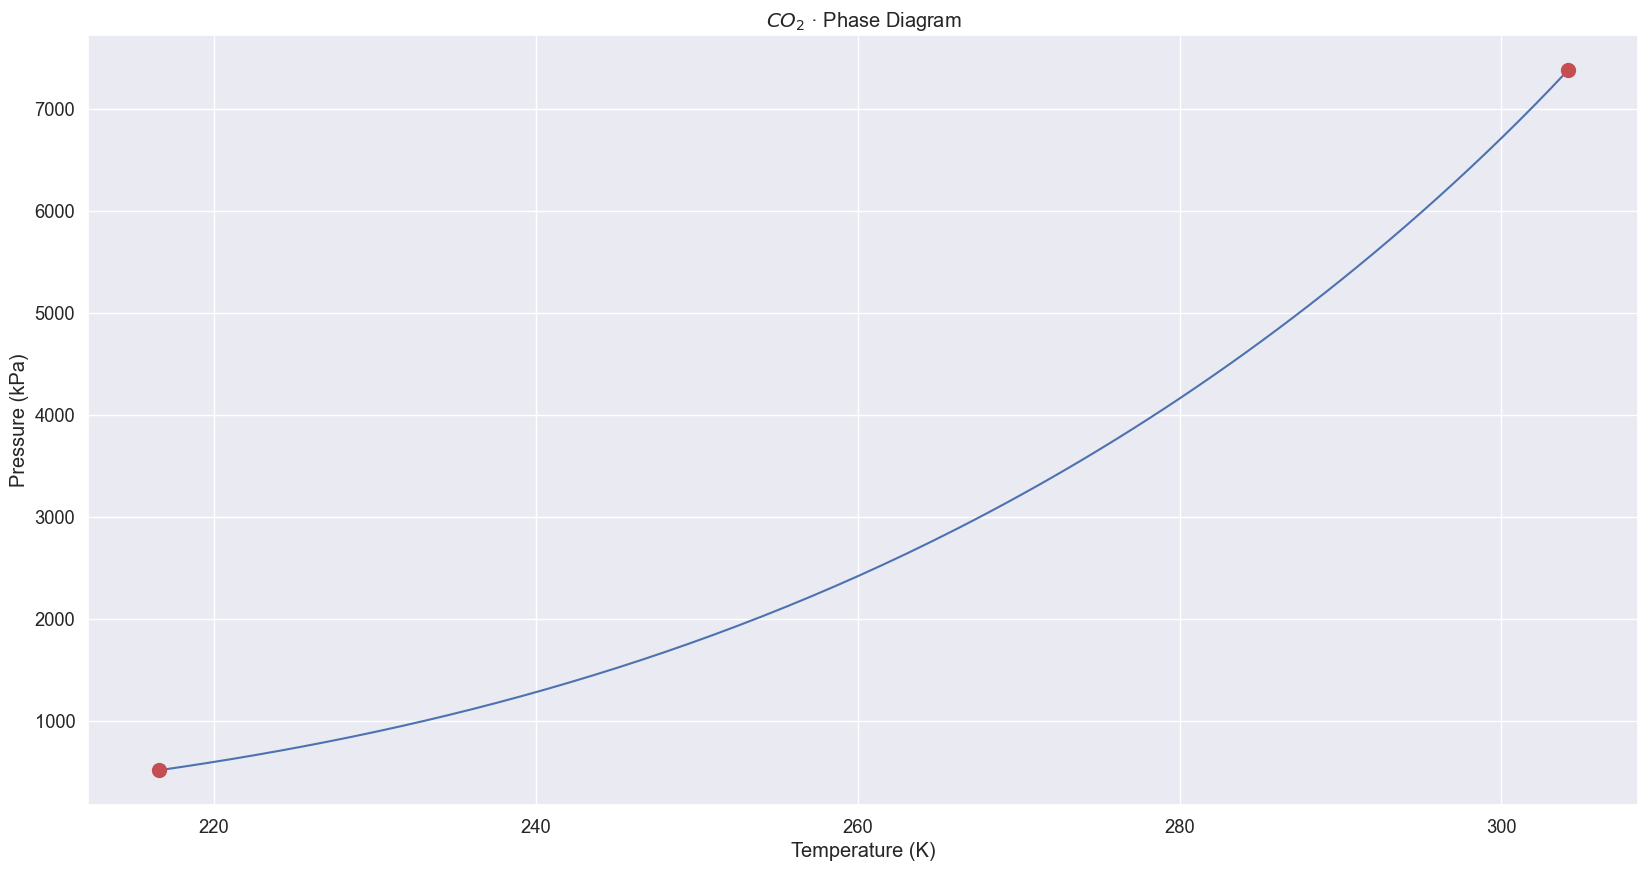

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

# title
ax.set_title(r'$CO_2$ · Phase Diagram')

# phase diagram
plt.plot(T, psat, 'b')

# labels for phases
#ax.text(-20, 4000, 'Liquid', size=24)
#ax.text( 20, 4000, 'Vapor',  size=24)

# triple point
ax.plot(Tt, Pt, 'ro', markersize=10) # state marker
#ax.text(-57, 250, r'Triple point: 518 $\mathrm{kPa}$, -56.6 $\mathrm{K}$', size=16)

# critical point
ax.plot(Tc, Pc, 'ro', markersize=10) # state marker
#ax.text(11, 7300, r'Critical point: 31 $\mathrm{^oC}$, 7377 $\mathrm{kPa}$', size=16)

#axis labels
plt.ylabel('Pressure (kPa)')
plt.xlabel('Temperature (K)')

plt.show()

## P - $\upsilon$ diagram

### Semi-logarithmic graph

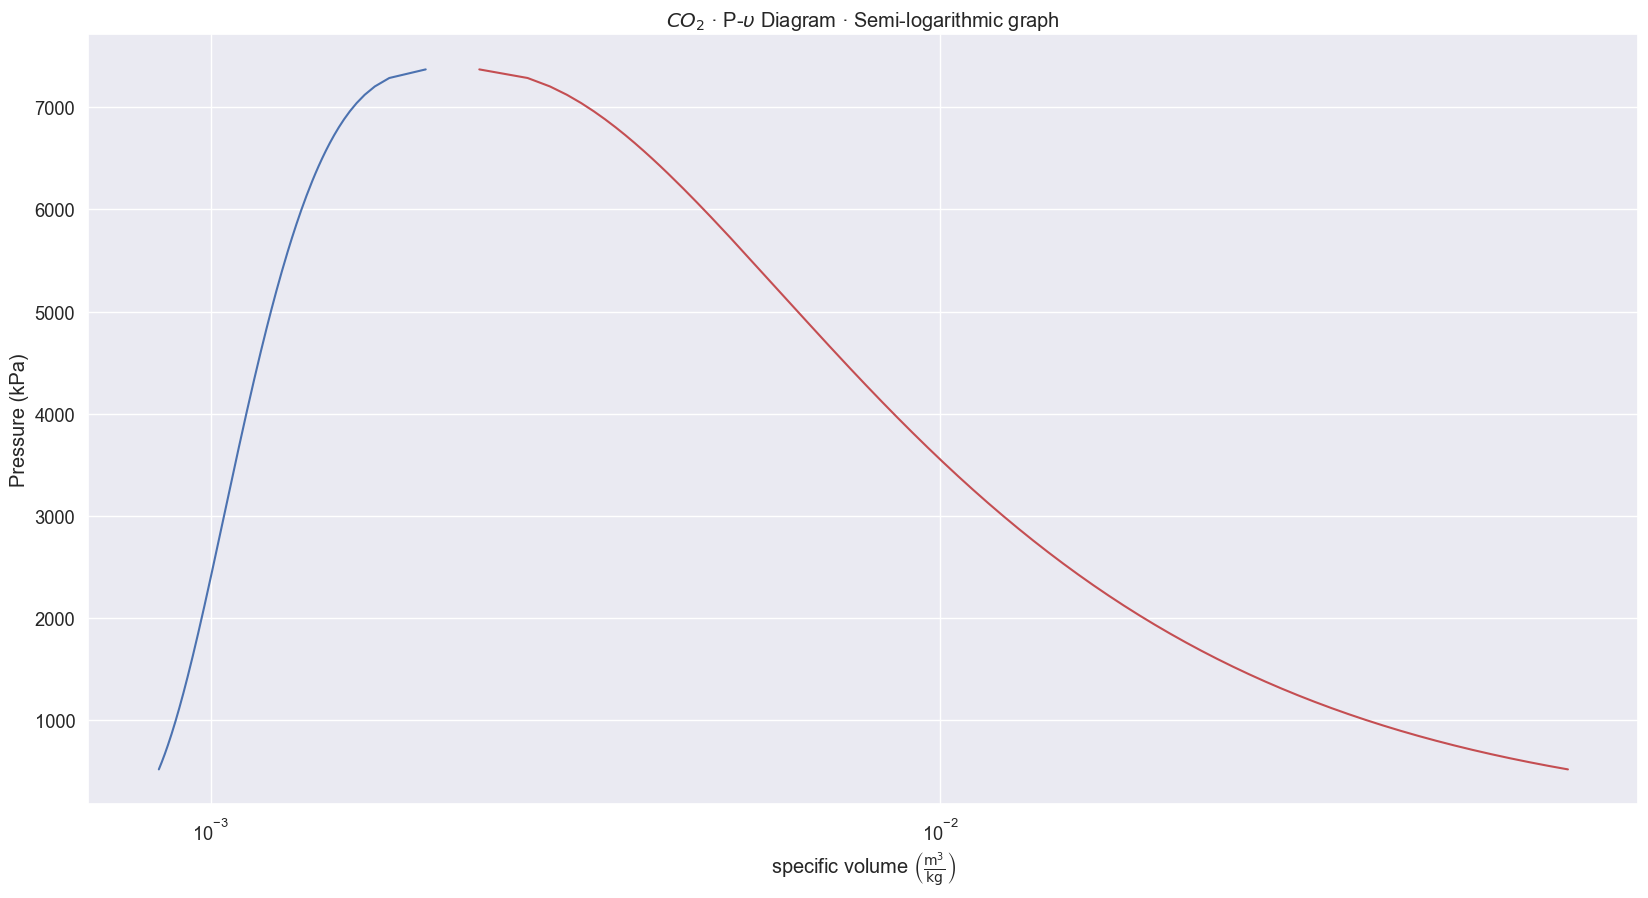

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

# title
ax.set_title(r'$CO_2$ · P-$\upsilon$ Diagram · Semi-logarithmic graph')

# creation of the log scale
ax.set_xscale("log")

# saturation diagram
ax.plot(vf, psat, 'b')
ax.plot(vg, psat, 'r')

# liquid phase
#ax.text(0.0008, 4000, 'L', size=24)

# liquid+vapor phase
#ax.text(0.0025, 4000, 'Liquid + Vapor', size=24)

# superheated vapor phase
#ax.text(0.02, 4000, 'Superheated Vapor', size=24)

# axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

### Semi-logarithmic graph (grids)

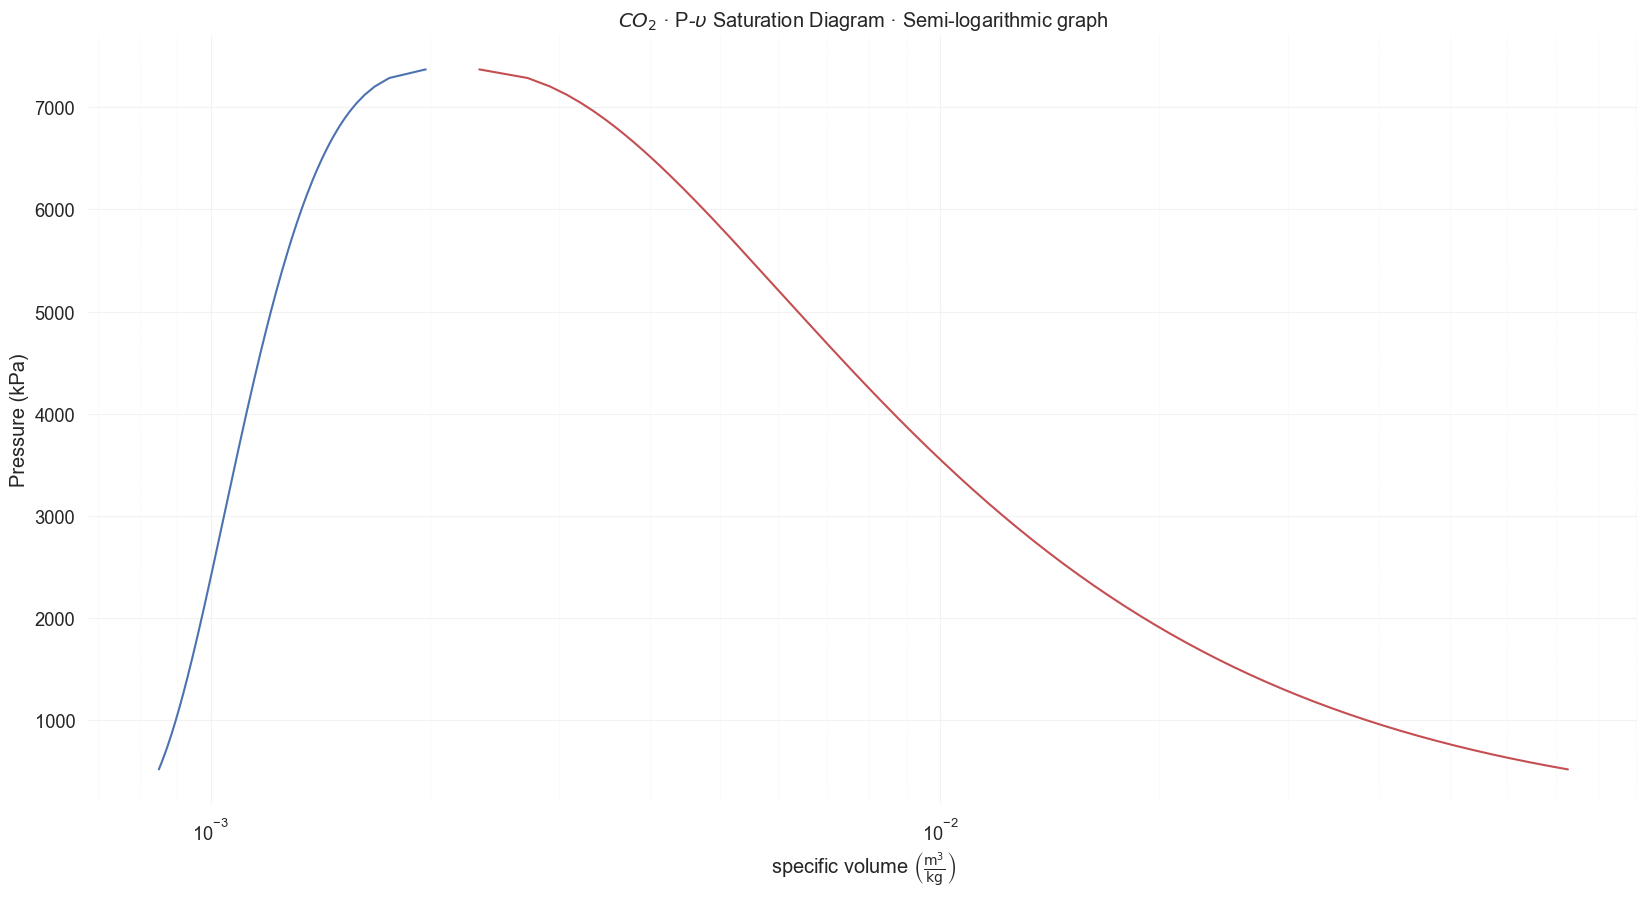

In [15]:
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')  # figure bg
ax.set_facecolor('white')                                   # axes bg
ax.set_axisbelow(True)                                      # grid behind curves

# log scale
ax.set_xscale("log")

# subtle grid
ax.grid(which='major', color='0.95', linewidth=0.8)
ax.grid(which='minor', color='0.95', linewidth=0.7, linestyle=':')

# title
ax.set_title(r'$CO_2$ · P-$\upsilon$ Saturation Diagram · Semi-logarithmic graph')

# curves
ax.plot(vf, psat, 'b', zorder=3)
ax.plot(vg, psat, 'r', zorder=3)

# labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()


### Graph in normal scale

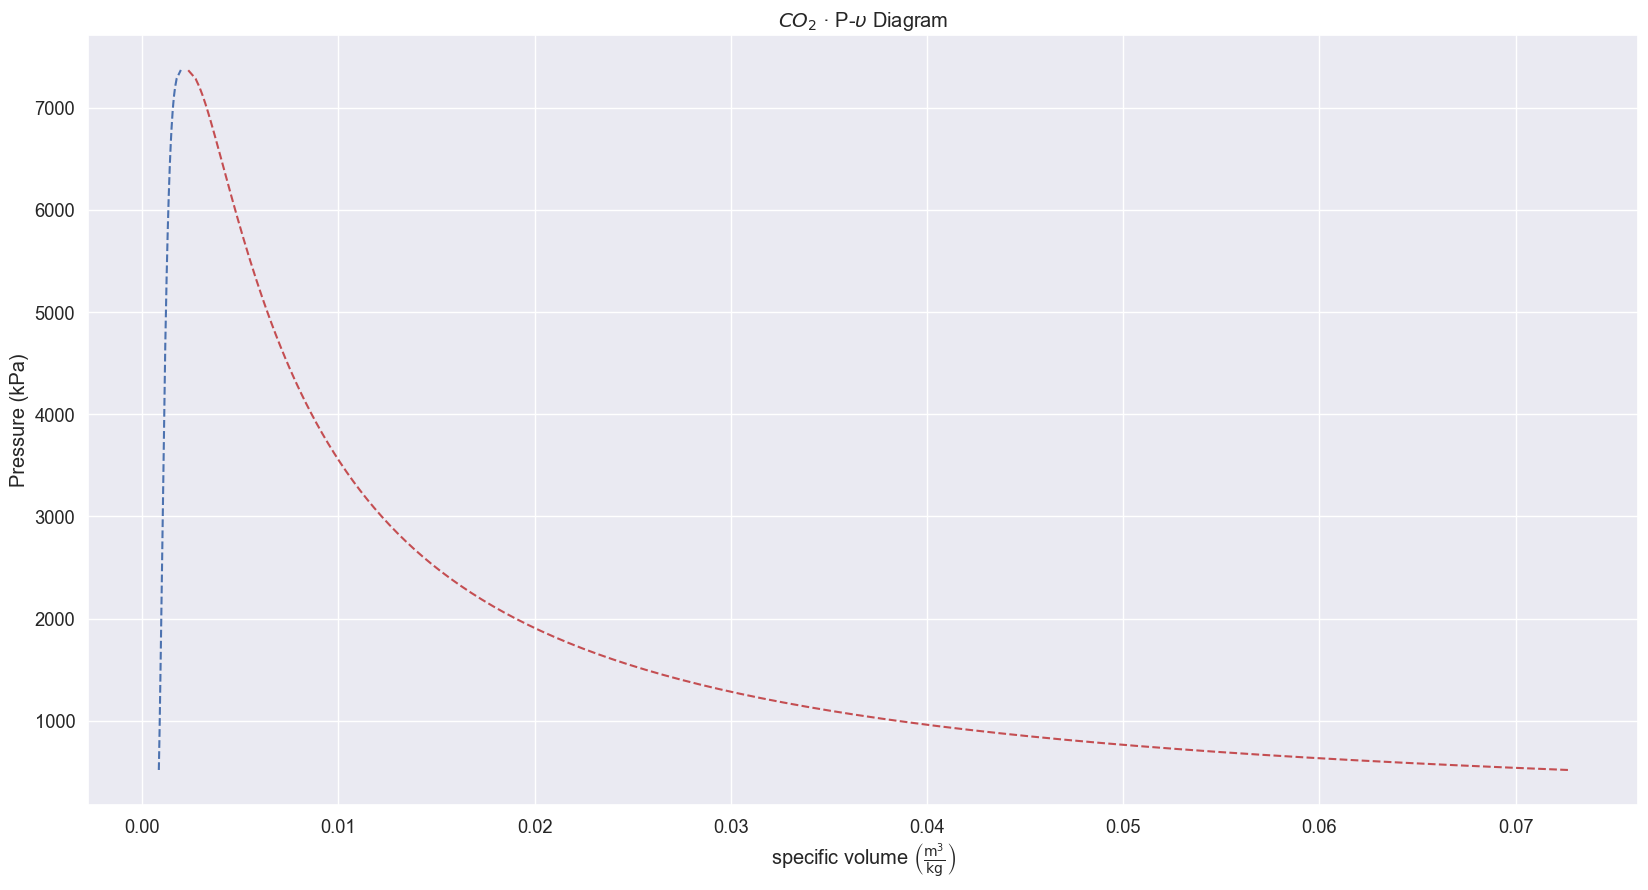

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))

#title
ax.set_title(r'$CO_2$ · P-$\upsilon$ Diagram')

#plt.xlim(0, 0.5)

#saturation diagram
plt.plot(vf, psat, 'b--')
plt.plot(vg, psat, 'r--')

#axis labels
plt.ylabel('Pressure (kPa)')
plt.xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

## *T - $\upsilon$* diagram

### Semi-logarithmic graph

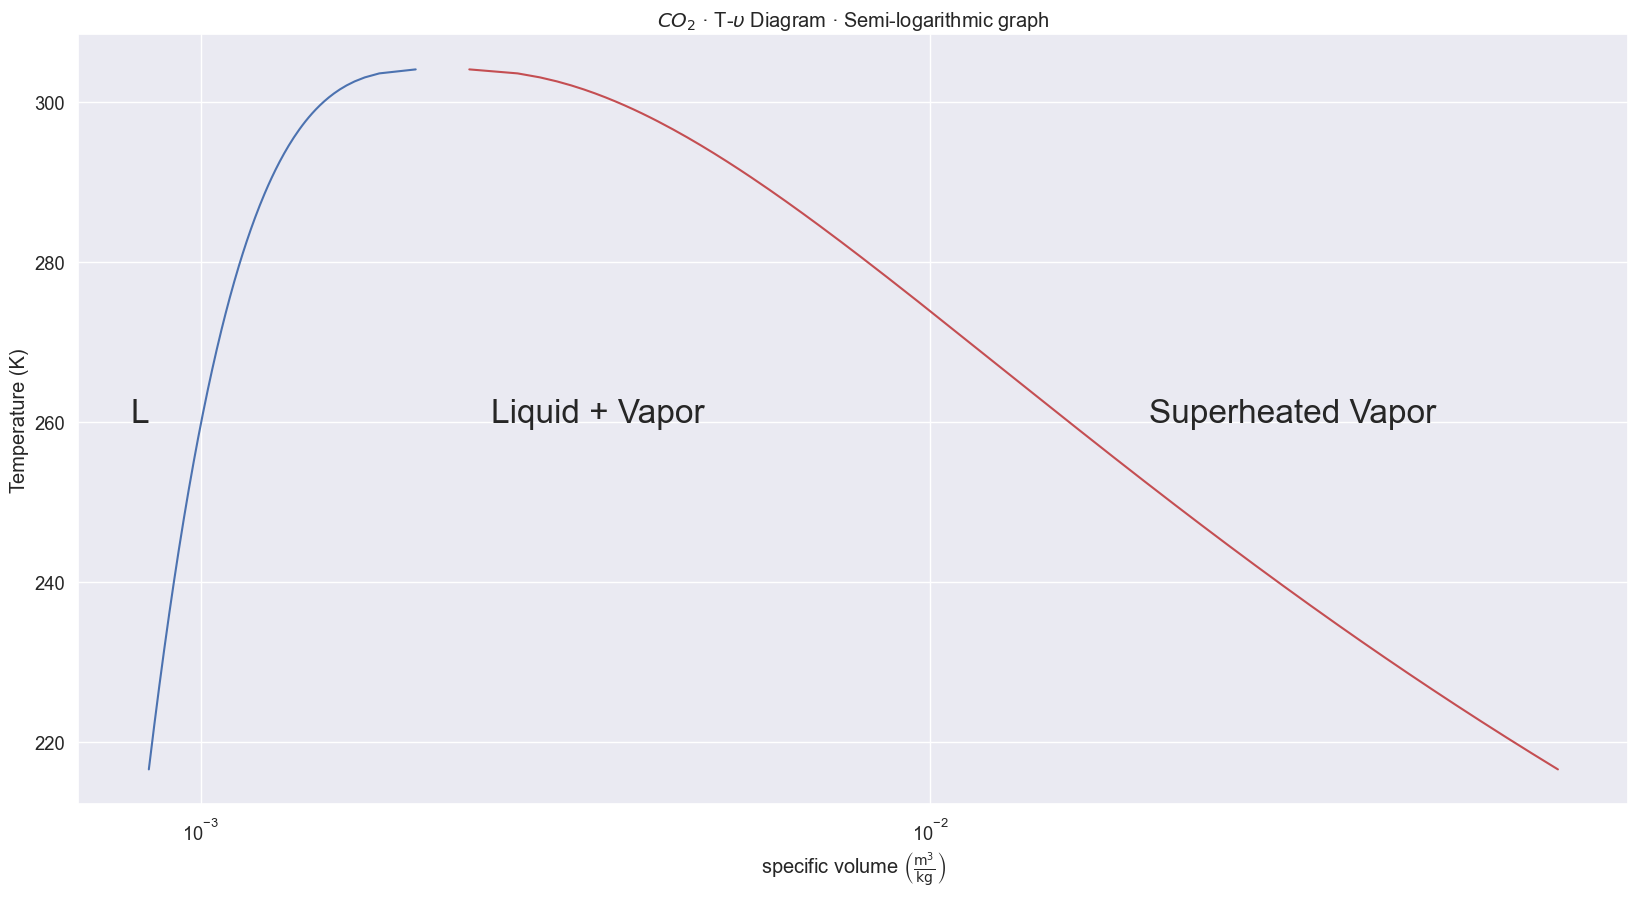

In [17]:
fig, ax = plt.subplots(figsize=(20,10))

# title
ax.set_title(r'$CO_2$ · T-$\upsilon$ Diagram · Semi-logarithmic graph')

# creation of the log scale
ax.set_xscale("log")

# saturation diagram
ax.plot(vf, T, 'b')
ax.plot(vg, T, 'r')

# liquid phase label
ax.text(0.0008, 260, 'L', size=24)

#liquid+vapor phase label
ax.text(0.0025, 260, 'Liquid + Vapor', size=24)

#superheated vapor phase label
ax.text(0.02, 260, 'Superheated Vapor', size=24)

#axis labels
ax.set_ylabel('Temperature (K)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

### Graph in normal scale

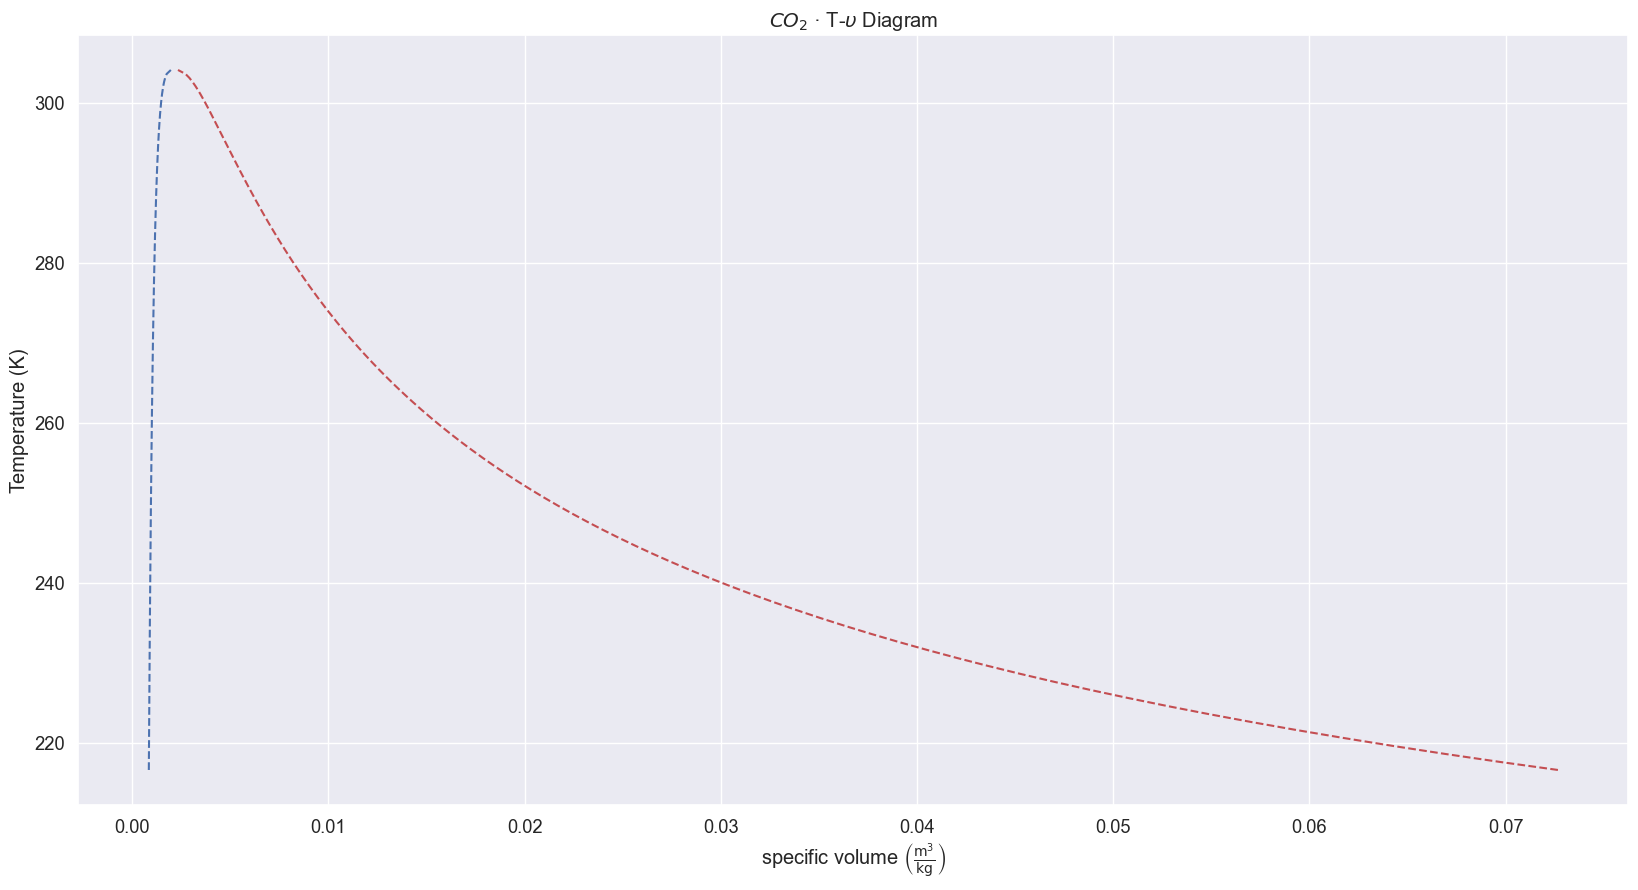

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))

# title
ax.set_title(r'$CO_2$ · T-$\upsilon$ Diagram')

# saturation diagram
ax.plot(vf, T, 'b--')
ax.plot(vg, T, 'r--')

# axis labels
ax.set_ylabel('Temperature (K)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

## *T - s* diagram

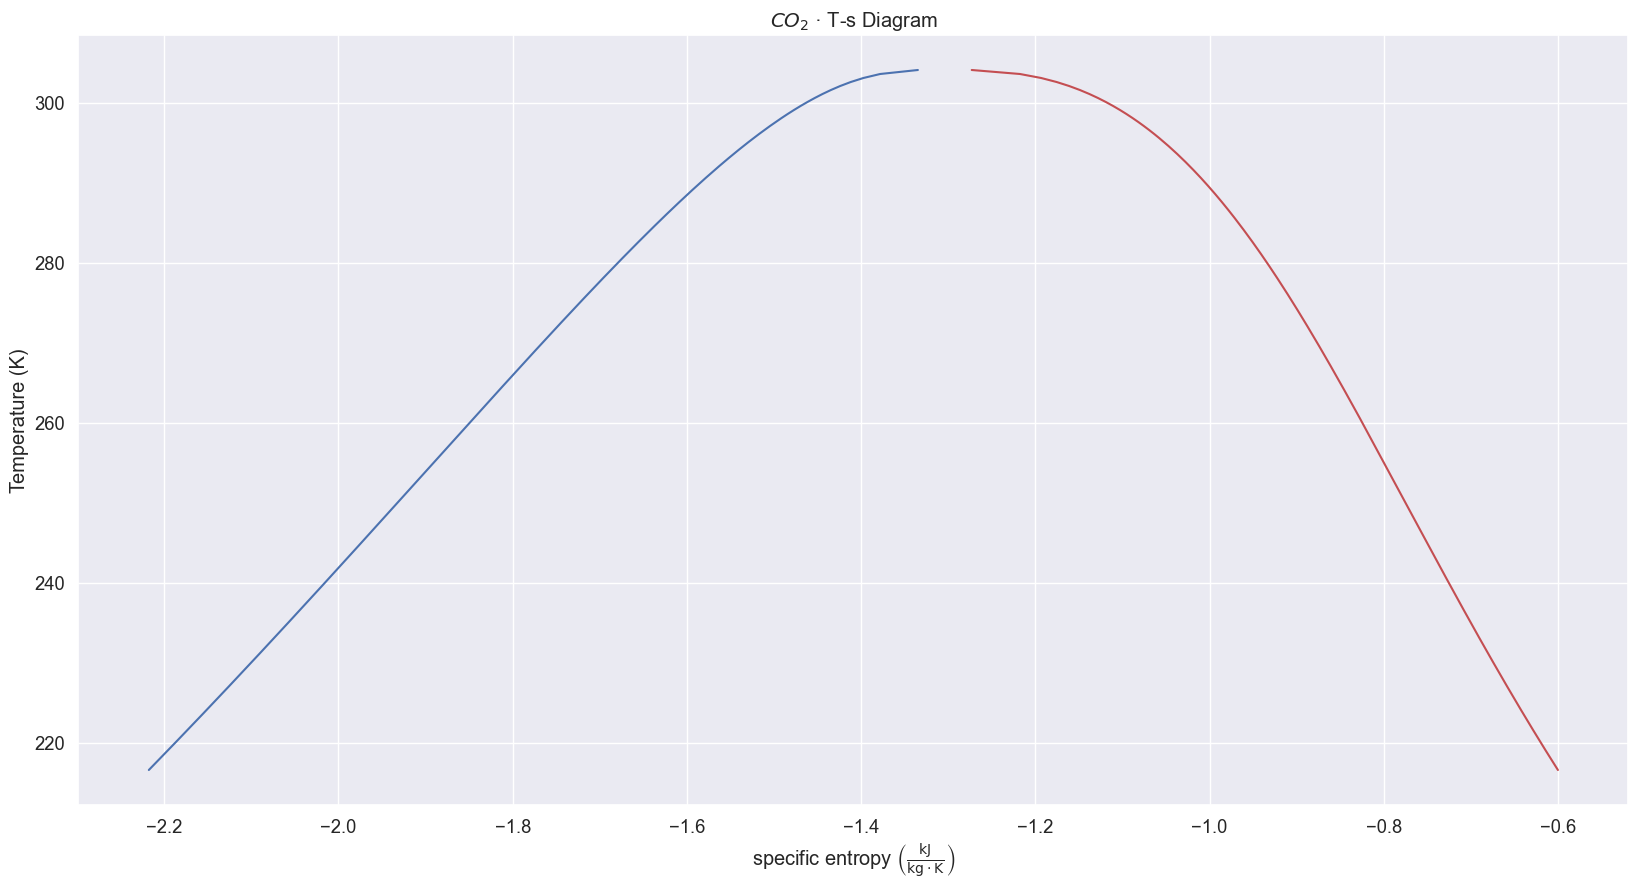

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))

# title
ax.set_title(r'$CO_2$ · T-s Diagram')

# saturation diagram
ax.plot(sf, T, 'b')
ax.plot(sg, T, 'r')

# axis labels
ax.set_ylabel('Temperature (K)')
ax.set_xlabel(r'specific entropy $\left( \mathrm{\frac{kJ}{kg \cdot K}} \right)$')

plt.show()